<a href="https://colab.research.google.com/github/amrrmadhn/genaibc-lumoshive/blob/master/Study%20Case%20-%202025%20GenAI%20BC/Studi%20Kasus%20Analisis%20Data%20dengan%20Pandas/Studi%20Kasus%20Analisis%20Data%20dengan%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# csv link
# https://raw.githubusercontent.com/amrrmadhn/genaibc-lumoshive/refs/heads/master/Study%20Case%20-%202025%20GenAI%20BC/Studi%20Kasus%20Analisis%20Data%20dengan%20Pandas/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import Dataset

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/amrrmadhn/genaibc-lumoshive/refs/heads/master/Study%20Case%20-%202025%20GenAI%20BC/Studi%20Kasus%20Analisis%20Data%20dengan%20Pandas/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.shape

(7043, 21)

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Quality

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Missing Value Handling

In [36]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing values di TotalCharges setelah konversi: {df['TotalCharges'].isnull().sum()}\n")

Missing values di TotalCharges setelah konversi: 11



In [41]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Duplicate Handling

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


`> Tidak ada duplicated untuk dataset ini`



# Descriptive Statistics and Distribution

In [42]:
print("Statistik MonthlyCharges:")
print(f"  Mean   : ${df['MonthlyCharges'].mean():.2f}")
print(f"  Median : ${df['MonthlyCharges'].median():.2f}")
print(f"  Std Dev: ${df['MonthlyCharges'].std():.2f}\n")

Statistik MonthlyCharges:
  Mean   : $64.76
  Median : $70.35
  Std Dev: $30.09



In [43]:
print("Statistik TotalCharges:")
print(f"  Mean   : ${df['TotalCharges'].mean():.2f}")
print(f"  Median : ${df['TotalCharges'].median():.2f}")
print(f"  Std Dev: ${df['TotalCharges'].std():.2f}\n")

Statistik TotalCharges:
  Mean   : $2283.30
  Median : $1397.47
  Std Dev: $2266.77



## Histogram

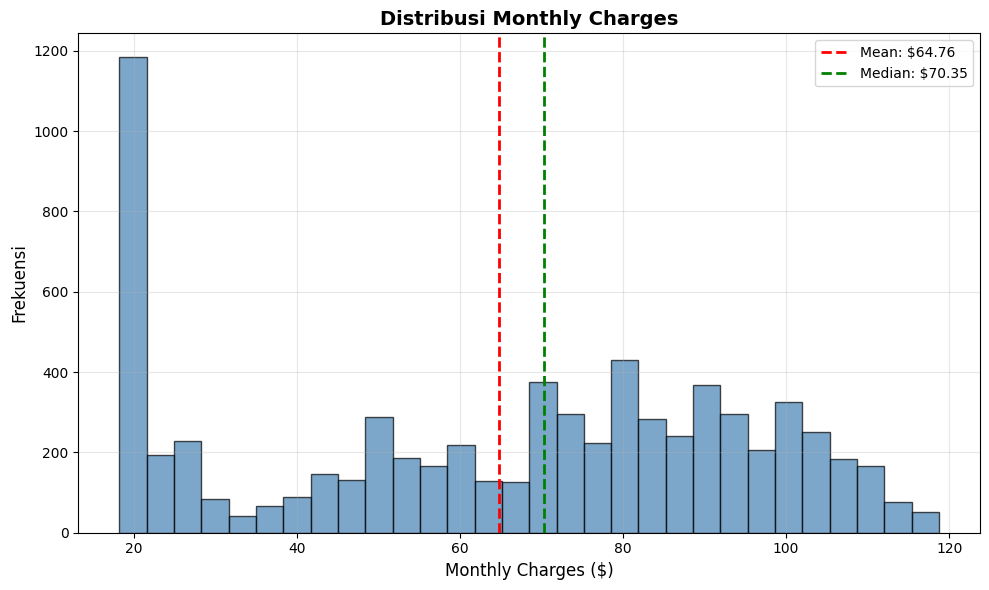

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(df['MonthlyCharges'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["MonthlyCharges"].mean():.2f}')
plt.axvline(df['MonthlyCharges'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["MonthlyCharges"].median():.2f}')
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Monthly Charges', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Modus InternetService

In [45]:
mode_internet = df['InternetService'].mode()[0]
mode_count = (df['InternetService'] == mode_internet).sum()
print(f"Modus InternetService: {mode_internet} ({mode_count} pelanggan)\n")

Modus InternetService: Fiber optic (3096 pelanggan)



# Univariate

In [46]:
contract_percentage = df['Contract'].value_counts(normalize=True) * 100
print("Persentase Pelanggan berdasarkan Kategori Kontrak:")
print(contract_percentage)

Persentase Pelanggan berdasarkan Kategori Kontrak:
Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64


/tmp/ipython-input-2153693076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_percentage.index, y=contract_percentage.values, palette='viridis')


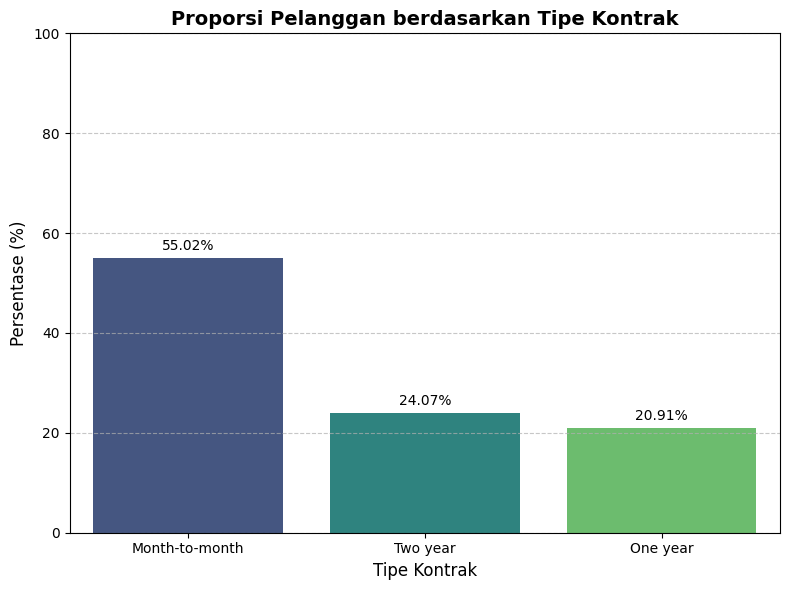

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_percentage.index, y=contract_percentage.values, palette='viridis')
plt.title('Proporsi Pelanggan berdasarkan Tipe Kontrak', fontsize=14, fontweight='bold')
plt.xlabel('Tipe Kontrak', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai persentase di atas setiap bar
for index, value in enumerate(contract_percentage.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Bivariate

In [48]:
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(method='pearson')
print("Matriks Korelasi Pearson:")
print(correlation_matrix)

Matriks Korelasi Pearson:
                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


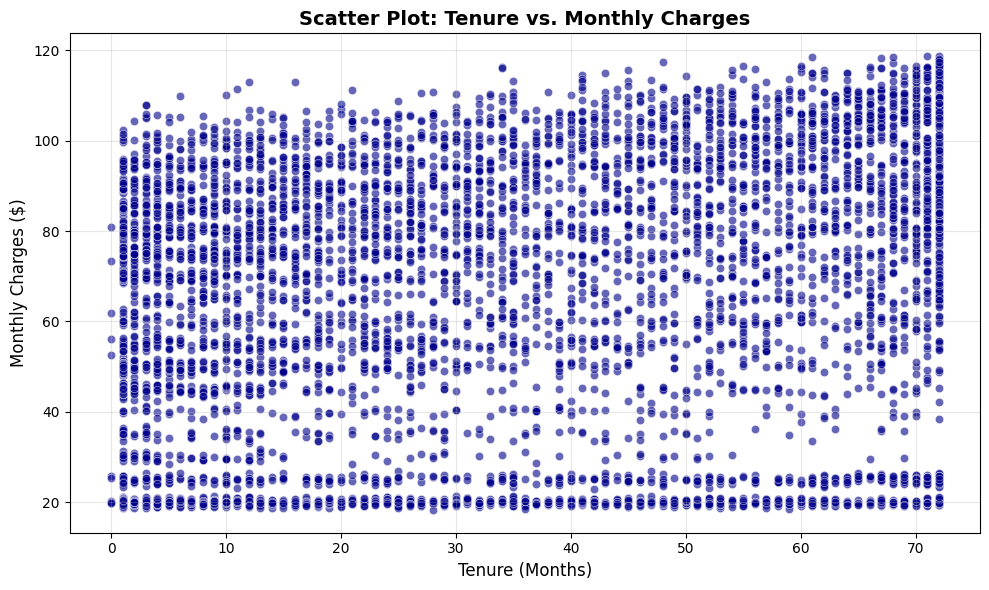

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, alpha=0.6, color='darkblue')
plt.title('Scatter Plot: Tenure vs. Monthly Charges', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

```
Penjelasan Hubungan antara `tenure` dan `MonthlyCharges`

Dari scatter plot di atas, kita dapat mengamati pola hubungan antara `tenure` (lama berlangganan) dan `MonthlyCharges` (biaya bulanan).

Analisis Visual:
Tren Positif: Umumnya, terlihat ada tren positif. Artinya, pelanggan dengan `tenure` yang lebih lama cenderung memiliki `MonthlyCharges` yang lebih tinggi. Ini mungkin disebabkan oleh pelanggan lama yang meng-upgrade layanan mereka atau mengambil paket yang lebih mahal seiring waktu.

Klasterisasi: Mungkin ada beberapa klaster atau kelompok pelanggan:
  Pelanggan dengan `tenure` rendah (bulan-bulan pertama) menunjukkan berbagai `MonthlyCharges`, dari yang rendah hingga tinggi, menunjukkan bahwa pelanggan baru bisa memilih paket dasar atau premium.
  Pada `tenure` yang lebih tinggi, penyebaran `MonthlyCharges` mungkin menjadi lebih terfokus pada nilai yang lebih tinggi, mengindikasikan bahwa pelanggan setia seringkali menggunakan layanan yang lebih komprehensif.

Penyebaran Data: Data tidak tersebar secara sempurna di sekitar garis lurus, menunjukkan bahwa meskipun ada hubungan positif, korelasi mungkin tidak terlalu kuat atau linear secara sempurna. Variasi dalam `MonthlyCharges` untuk `tenure` tertentu bisa disebabkan oleh faktor lain seperti jenis layanan internet, layanan tambahan (keamanan, streaming), dan lain-lain.

Secara keseluruhan, scatter plot ini mengindikasikan adanya korelasi positif moderat antara `tenure` dan `MonthlyCharges`. Pelanggan cenderung membayar lebih banyak per bulan seiring dengan lamanya mereka menjadi pelanggan.
```


In [50]:
churn_contract_crosstab = pd.crosstab(df['Contract'], df['Churn'], margins=True, normalize='index') * 100
print("Distribusi Churn berdasarkan Tipe Kontrak:")
print(churn_contract_crosstab.round(2))

Distribusi Churn berdasarkan Tipe Kontrak:
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83
All             73.46  26.54


```
Interpretasi Hasil Distribusi Churn berdasarkan Tipe Kontrak
Dari tabel pd.crosstab di atas yang menunjukkan persentase churn berdasarkan tipe kontrak, kita dapat menarik beberapa kesimpulan:

Kontrak Bulanan (Month-to-month): Pelanggan dengan kontrak bulanan memiliki tingkat churn yang paling tinggi. Sekitar 42.71% dari pelanggan dengan kontrak ini cenderung churn. Ini menunjukkan bahwa pelanggan dengan komitmen jangka pendek lebih mudah untuk berhenti berlangganan.

Kontrak Satu Tahun (One year): Tingkat churn untuk pelanggan dengan kontrak satu tahun jauh lebih rendah dibandingkan kontrak bulanan, yaitu sekitar 11.27%. Ini mengindikasikan bahwa komitmen jangka menengah dapat secara signifikan mengurangi kemungkinan churn.

Kontrak Dua Tahun (Two year): Pelanggan dengan kontrak dua tahun memiliki tingkat churn terendah, hanya sekitar 2.83%. Ini adalah tipe kontrak paling stabil, menunjukkan bahwa komitmen jangka panjang hampir menghilangkan risiko churn.

Secara Keseluruhan (All): Rata-rata tingkat churn di seluruh pelanggan adalah sekitar 26.54%.

Kesimpulan: Ada hubungan yang sangat kuat antara tipe kontrak dan tingkat churn. Semakin panjang durasi kontrak yang dipilih pelanggan, semakin rendah kemungkinan mereka untuk churn. Ini menyoroti pentingnya mendorong pelanggan untuk memilih paket kontrak jangka panjang guna meningkatkan retensi pelanggan.
```



# Outlier Handling

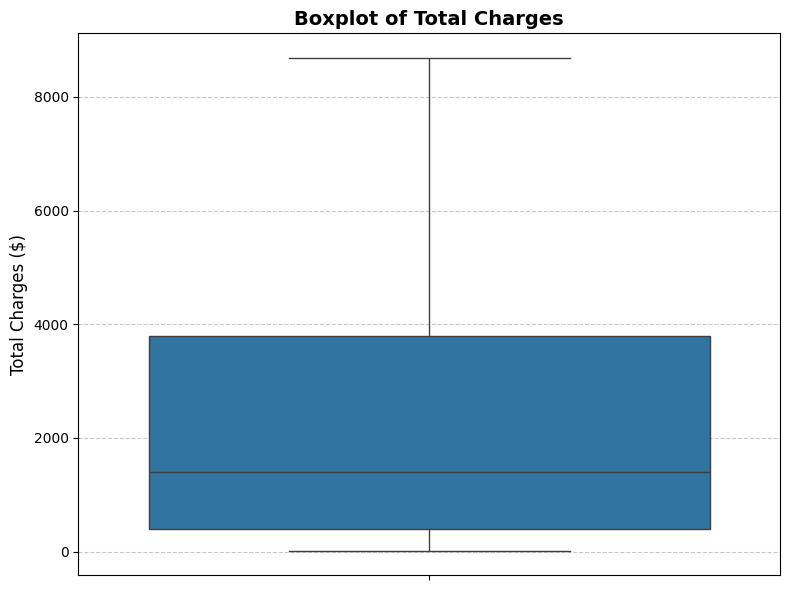

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['TotalCharges'])
plt.title('Boxplot of Total Charges', fontsize=14, fontweight='bold')
plt.ylabel('Total Charges ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)]

print(f"Jumlah outlier pada TotalCharges: {len(outliers)}")
print("Contoh outlier:\n")
display(outliers.head())

Jumlah outlier pada TotalCharges: 0
Contoh outlier:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Pivot Table & Aggregation

In [53]:
pivot_table_monthly_charges = pd.pivot_table(df, values='MonthlyCharges', index='OnlineSecurity', columns='Churn', aggfunc='mean')

print("Rata-rata MonthlyCharges berdasarkan OnlineSecurity dan Churn:")
display(pivot_table_monthly_charges)

Rata-rata MonthlyCharges berdasarkan OnlineSecurity dan Churn:


Churn,No,Yes
OnlineSecurity,,
No,74.625233,77.181896
No internet service,21.136058,20.368142
Yes,78.369432,81.581356




```
Berdasarkan pivot table di atas, berikut adalah beberapa insight mengenai hubungan antara layanan OnlineSecurity dan Churn:

Pelanggan tanpa OnlineSecurity memiliki potensi Churn lebih tinggi dengan MonthlyCharges tinggi: Pelanggan yang tidak berlangganan OnlineSecurity namun membayar MonthlyCharges yang tinggi ($74.60) menunjukkan tingkat churn yang signifikan. Ini mungkin mengindikasikan mereka merasa tidak mendapatkan nilai yang sepadan dengan biaya yang dibayar, terutama karena kurangnya fitur keamanan.
OnlineSecurity berkorelasi dengan MonthlyCharges yang lebih tinggi: Secara umum, pelanggan yang memiliki OnlineSecurity membayar biaya bulanan (MonthlyCharges) yang lebih tinggi, terlepas dari apakah mereka churn atau tidak.
Pelanggan tanpa layanan internet (dan OnlineSecurity) cenderung memiliki MonthlyCharges rendah dan churn lebih rendah: Pelanggan yang tidak memiliki layanan internet sama sekali (dan karenanya tidak memiliki OnlineSecurity) membayar MonthlyCharges yang sangat rendah dan memiliki tingkat churn yang relatif rendah. Ini menunjukkan bahwa layanan dasar mungkin memiliki retensi yang lebih baik, atau churn mereka tidak didorong oleh biaya tinggi.
```



# Correlation Visualization

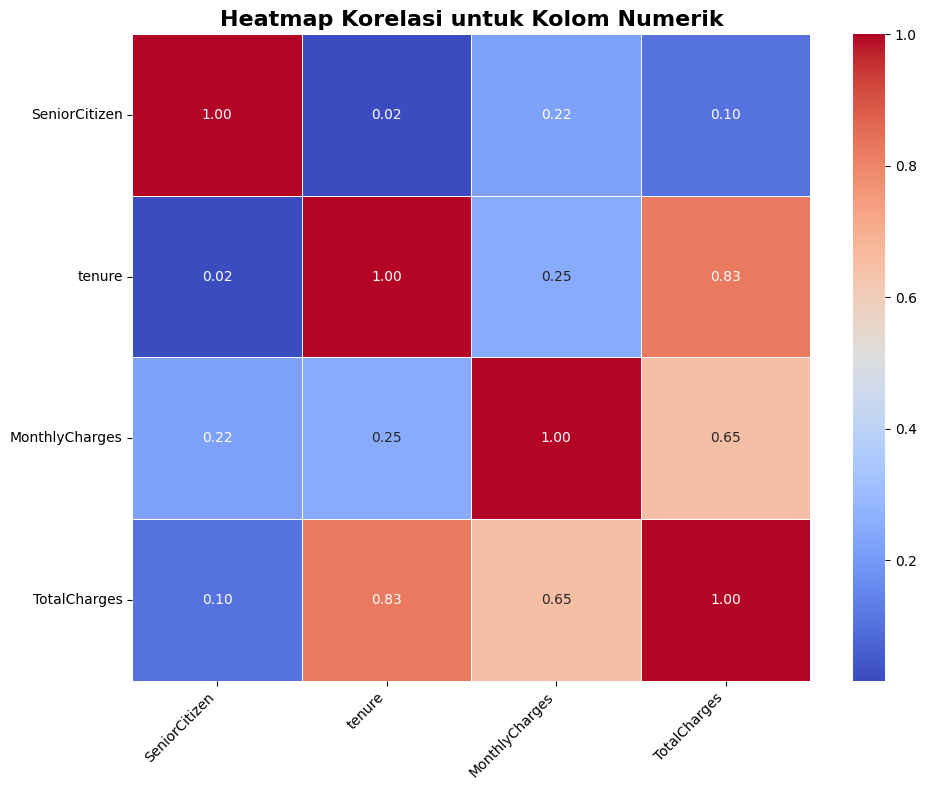

In [54]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_all_numeric = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi untuk Kolom Numerik', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



```
Tiga pasang variabel numerik dengan korelasi tertinggi dan alasannya:

tenure dan TotalCharges (Korelasi Positif Kuat: ~0.83): Semakin lama pelanggan berlangganan (tenure), semakin besar total biaya yang mereka bayarkan (TotalCharges). Ini sangat logis karena total biaya akan terakumulasi seiring berjalannya waktu.

MonthlyCharges dan TotalCharges (Korelasi Positif Moderat hingga Kuat: ~0.65): Pelanggan dengan biaya bulanan yang lebih tinggi (MonthlyCharges) cenderung memiliki total biaya yang lebih tinggi (TotalCharges). Ini juga masuk akal karena biaya bulanan yang lebih besar akan berkontribusi pada total biaya yang lebih besar.

tenure dan MonthlyCharges (Korelasi Positif Lemah: ~0.25): Terdapat korelasi positif yang lemah. Meskipun tidak terlalu kuat, ada tren bahwa pelanggan yang lebih lama (tenure) mungkin memiliki biaya bulanan (MonthlyCharges) yang sedikit lebih tinggi, kemungkinan karena mereka telah meng-upgrade layanan atau memilih paket yang lebih mahal seiring waktu.
```




# Business Insight

## Rekomendasi Bisnis untuk Mengurangi Churn Pelanggan

Berdasarkan analisis data yang telah dilakukan, berikut adalah tiga rekomendasi bisnis konkret yang dapat membantu mengurangi churn pelanggan:

1.  **Dorong Pelanggan untuk Beralih ke Kontrak Jangka Panjang**
    *   **Insight:** Pelanggan dengan kontrak bulanan (`Month-to-month`) memiliki tingkat churn yang sangat tinggi (sekitar 42.71%), jauh lebih tinggi dibandingkan kontrak satu tahun (11.27%) atau dua tahun (2.83%). Ini menunjukkan bahwa komitmen jangka pendek sangat rentan terhadap churn.
    *   **Rekomendasi:** Implementasikan program insentif (misalnya, diskon khusus, penawaran bundel layanan tambahan, atau peningkatan kecepatan internet gratis) untuk mendorong pelanggan bulanan beralih ke kontrak 1 atau 2 tahun. Kampanye ini harus proaktif, menargetkan pelanggan bulanan sebelum mereka mempertimbangkan untuk berhenti berlangganan.

2.  **Tingkatkan Nilai Layanan Keamanan Online (OnlineSecurity)**
    *   **Insight:** Pelanggan yang tidak berlangganan `OnlineSecurity` tetapi memiliki `MonthlyCharges` yang tinggi menunjukkan kecenderungan churn yang signifikan. Di sisi lain, pelanggan yang memiliki `OnlineSecurity` cenderung memiliki `MonthlyCharges` yang lebih tinggi tetapi tingkat churn yang lebih rendah. Ini mengindikasikan bahwa fitur keamanan bisa menjadi penambah nilai yang efektif.
    *   **Rekomendasi:** Promosikan manfaat `OnlineSecurity` secara lebih agresif, terutama kepada pelanggan yang membayar biaya bulanan tinggi namun belum memiliki fitur ini. Pertimbangkan untuk mem-bundling `OnlineSecurity` dengan paket internet premium atau menawarkannya sebagai *add-on* dengan harga menarik untuk meningkatkan persepsi nilai dan menjaga kepuasan pelanggan.

3.  **Program Loyalitas untuk Pelanggan Jangka Panjang dan Bernilai Tinggi**
    *   **Insight:** `tenure` (lama berlangganan) sangat berkorelasi positif dengan `TotalCharges`, yang berarti pelanggan yang lebih lama adalah pelanggan yang paling berkontribusi pada pendapatan kumulatif. Meskipun korelasi dengan `MonthlyCharges` tidak sekuat itu, ada tren positif. Penting untuk mempertahankan pelanggan yang sudah lama dan membayar mahal.
    *   **Rekomendasi:** Kembangkan program loyalitas eksklusif atau inisiatif *customer success* yang ditargetkan untuk pelanggan dengan masa berlangganan yang panjang (`tenure` tinggi) dan `MonthlyCharges` yang tinggi. Program ini bisa berupa penawaran personal, layanan pelanggan prioritas, atau akses awal ke fitur/layanan baru untuk memastikan mereka merasa dihargai dan terus mendapatkan nilai dari layanan, sehingga mengurangi kemungkinan mereka mencari alternatif lain.
  